In [4]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, Conv2DTranspose
from tensorflow.keras.layers import LeakyReLU, Activation, Flatten, Dense
from tensorflow.keras.layers import Reshape, Input
from tensorflow.keras.models import Model

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [10]:
encoding_dim = 16
input_img = Input(shape=(784,))

encoded = Dense(encoding_dim, activation='LeakyReLU')(input_img)

decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

In [11]:
encoder = Model(input_img, encoded)

encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [12]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [18]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [19]:
autoencoder.fit(x_train,x_train,
               epochs=20,
               batch_size=256,
               validation_data=(x_test,x_test))

Epoch 1/20
235/235 [==============================] - 3s 7ms/step - loss: 0.3200 - val_loss: 0.2340
Epoch 2/20
235/235 [==============================] - 1s 6ms/step - loss: 0.2082 - val_loss: 0.1885
Epoch 3/20
235/235 [==============================] - 1s 6ms/step - loss: 0.1794 - val_loss: 0.1683
Epoch 4/20
235/235 [==============================] - 1s 6ms/step - loss: 0.1632 - val_loss: 0.1561
Epoch 5/20
235/235 [==============================] - 1s 6ms/step - loss: 0.1535 - val_loss: 0.1481
Epoch 6/20
235/235 [==============================] - 1s 6ms/step - loss: 0.1470 - val_loss: 0.1430
Epoch 7/20
235/235 [==============================] - 1s 5ms/step - loss: 0.1429 - val_loss: 0.1398
Epoch 8/20
235/235 [==============================] - 1s 5ms/step - loss: 0.1403 - val_loss: 0.1376
Epoch 9/20
235/235 [==============================] - 1s 5ms/step - loss: 0.1382 - val_loss: 0.1357
Epoch 10/20
235/235 [==============================] - 1s 5ms/step - loss: 0.1365 - val_loss: 0.1341

313/313 [==============================] - 1s 2ms/step


C:\Users\akash\AppData\Local\Temp\ipykernel_14808\185569061.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(2,4,i+1)


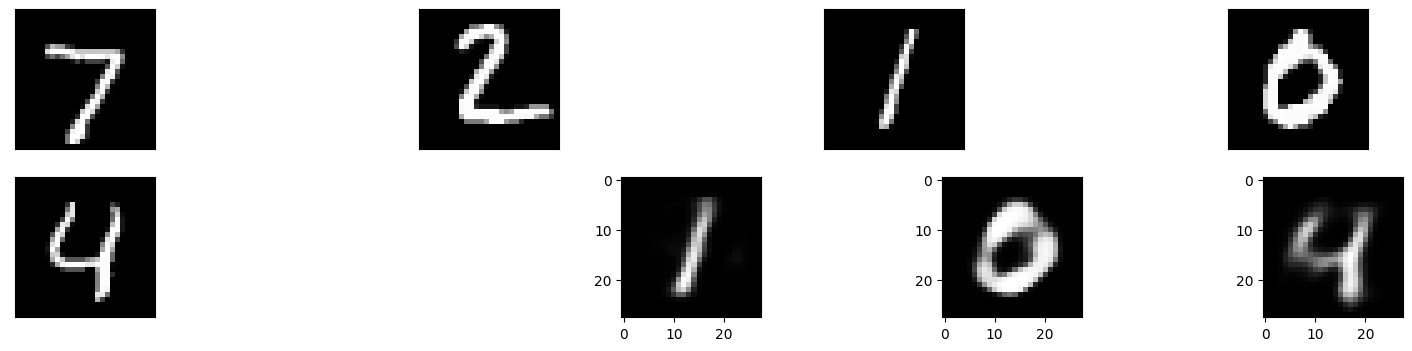

In [22]:
encoded_img = encoder.predict(x_test)
decoded_img = decoder.predict(encoded_img)
plt.figure(figsize=(20,4))
for i in range(5):
    ax = plt.subplot(2,4,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(decoded_img[i].reshape(28, 28))
    plt.gray()
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)
plt.show()